# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import graphviz

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [3]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
housing.drop('ocean_proximity', axis=1, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


A biblioteca Scikitlearn trabalha com variáveis númericas ou dummies. Com a exclusão da coluna "ocean_proximity", toda a base de dados está no formato adequado.

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [8]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [9]:
correlacao = housing.corr()["median_house_value"].sort_values(ascending=False)

print("Correlação das variáveis com median_house_value:")
print(correlacao)

Correlação das variáveis com median_house_value:
median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


"total_bedrooms" e "households" parecem ser boas opções de variável com potencial preditivo por possuírem correlações fortes com outras colunas.

Porém, a variável de maior correlação com a variável Target é a "median_income", sendo essa a melhor opção de variável preditiva. As outras duas citadas acima não estão nem mesmo no top  de maior correlação com a Target.

Uma outra observação, é que ordenando dessa forma, não apresenta um ranking de correlação correto, pois existem correlações negativas que são maiores que alguns postivos.

In [10]:
# Ordenar correlações por valor absoluto, excluindo a target
correlacao_abs = housing.corr()["median_house_value"].abs().sort_values(ascending=False)

print("Top 3 variáveis mais correlacionadas (por valor absoluto):")
print(correlacao_abs)

Top 3 variáveis mais correlacionadas (por valor absoluto):
median_house_value    1.000000
median_income         0.688355
latitude              0.144638
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
longitude             0.045398
population            0.025300
Name: median_house_value, dtype: float64


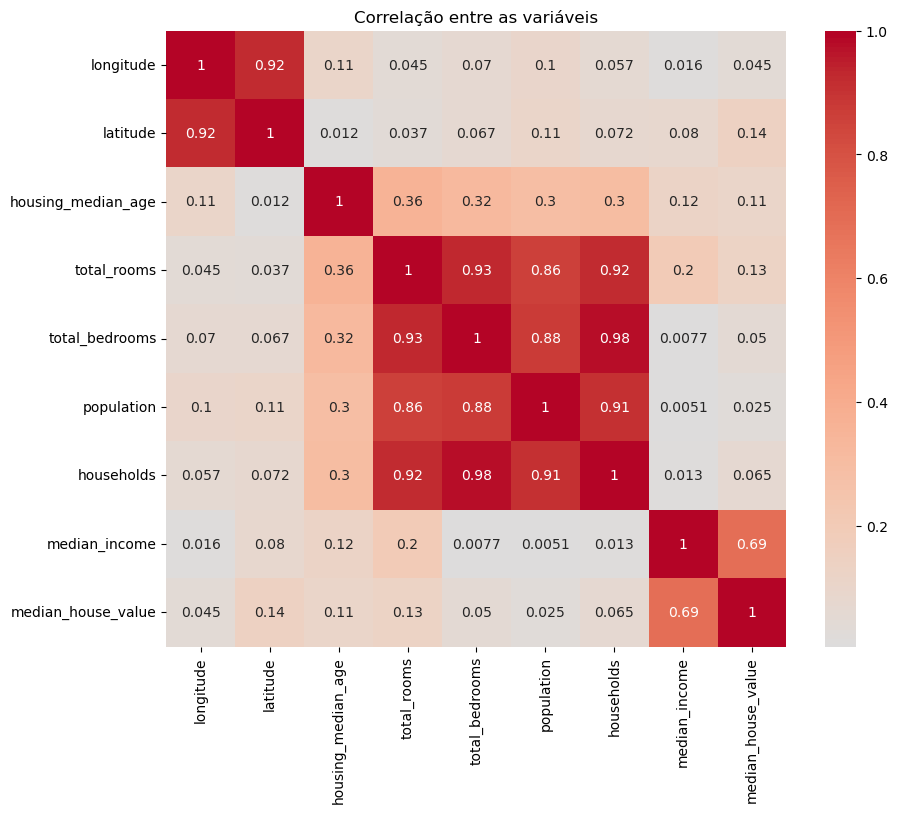

In [11]:
correlacao_matriz = housing.corr().abs()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_matriz, annot=True, cmap="coolwarm", center=0)
plt.title("Correlação entre as variáveis")
plt.show()

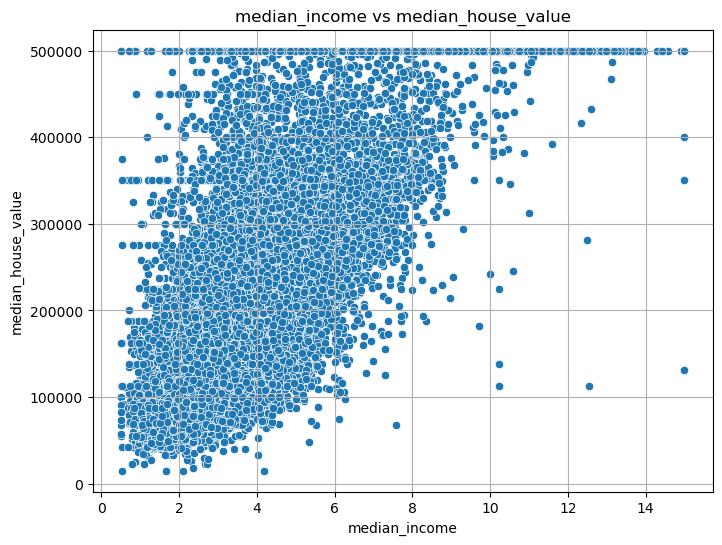

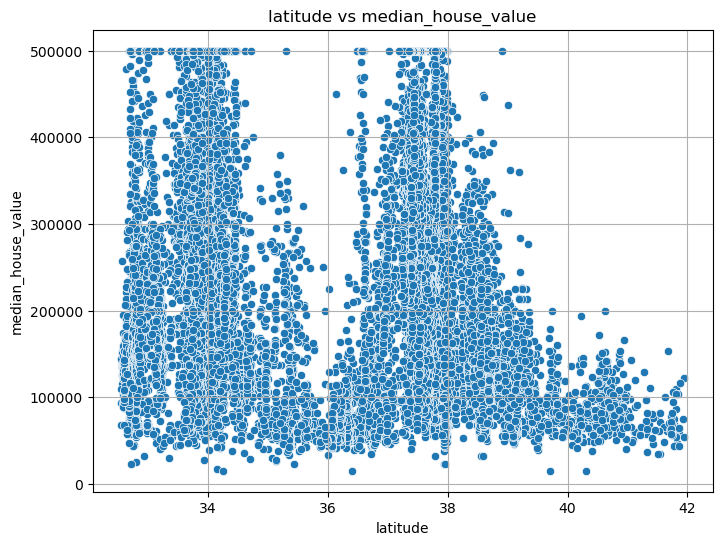

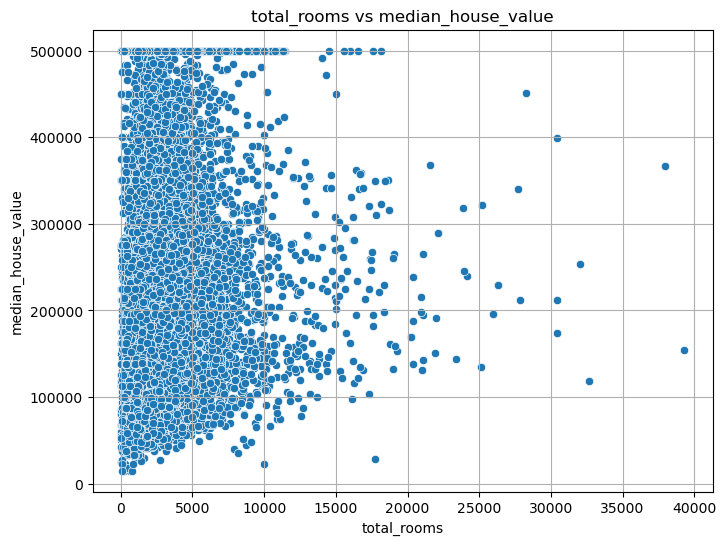

In [12]:
# Ordenar as correlações por valor absoluto
correlations_abs = housing.corr()["median_house_value"].abs().sort_values(ascending=False)[1:4]

# Criar scatterplots das variáveis mais correlacionadas
for col in correlations_abs.index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=housing[col], y=housing["median_house_value"])
    plt.title(f"{col} vs median_house_value")
    plt.xlabel(col)
    plt.ylabel("median_house_value")
    plt.grid(True)
    plt.show()

Uma rápida análise entre as 3 variáveis com maior correlação com a Target, é possível ver algum agrupamento e tendência acentuada de que quanto maior a renda média, maior o valor médio da casa. Essa agrupamento e tendência é visto até onde a renda média é entre 8~9, após isso, existem pontos afastados, que podem ser vistos como outliers. Valor média de casa de 500000 é possível ver em todas as faixas de renda média.

As outras duas variáveis não possuem uma correlação tão forte, mas é interessante analisar, pois pode fornecer análises complementares como localização e tamanho da casa, não superestimar uma única variável e melhorar a robustez do modelo.

OBS: Não necessariamente a melhor correlação determina a melhor variável para quebra.

### 3. Separe os dados em validação e teste

In [13]:
X = housing.drop(columns = ['median_house_value']).copy()

X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [14]:
y =  housing.loc[:,'median_house_value']

y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [16]:
arvore_regr_1 = DecisionTreeRegressor(max_depth=8)
arvore_regr_2 = DecisionTreeRegressor(max_depth=2)

arvore_regr_1.fit(X_train, y_train)
arvore_regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [17]:
# Calculando as previsões
y_pred_1 = arvore_regr_1.predict(X_train)

y_pred_2 = arvore_regr_2.predict(X_train)

In [18]:
# Calculando o MSE
mse_1 = mean_squared_error(y_train, y_pred_1)

mse_2 = mean_squared_error(y_train, y_pred_2)

In [19]:
# Calculando o R-quadrado
r_quadrado_1 = arvore_regr_1.score(X_train, y_train)
r_quadrado_2 = arvore_regr_2.score(X_train, y_train)

# Template para mostrar os resultados
template = "A árvore com profundidade={0} tem R-quadrado={1:.2f} e MSE={2:.2f}"

# Exibindo resultados
print(template.format(arvore_regr_1.get_depth(), r_quadrado_1, mse_1).replace(".",","))
print(template.format(arvore_regr_2.get_depth(), r_quadrado_2, mse_2).replace(".",","))

A árvore com profundidade=8 tem R-quadrado=0,76 e MSE=3225991009,13
A árvore com profundidade=2 tem R-quadrado=0,45 e MSE=7369471292,17


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Com base no resultado anterior, a árvore mais adequada é a que apresenta o R² maior, que no caso é a de profundidade 8, e que também possui o menor MSE, para reforçar que de fato, parece ser a mais adequada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

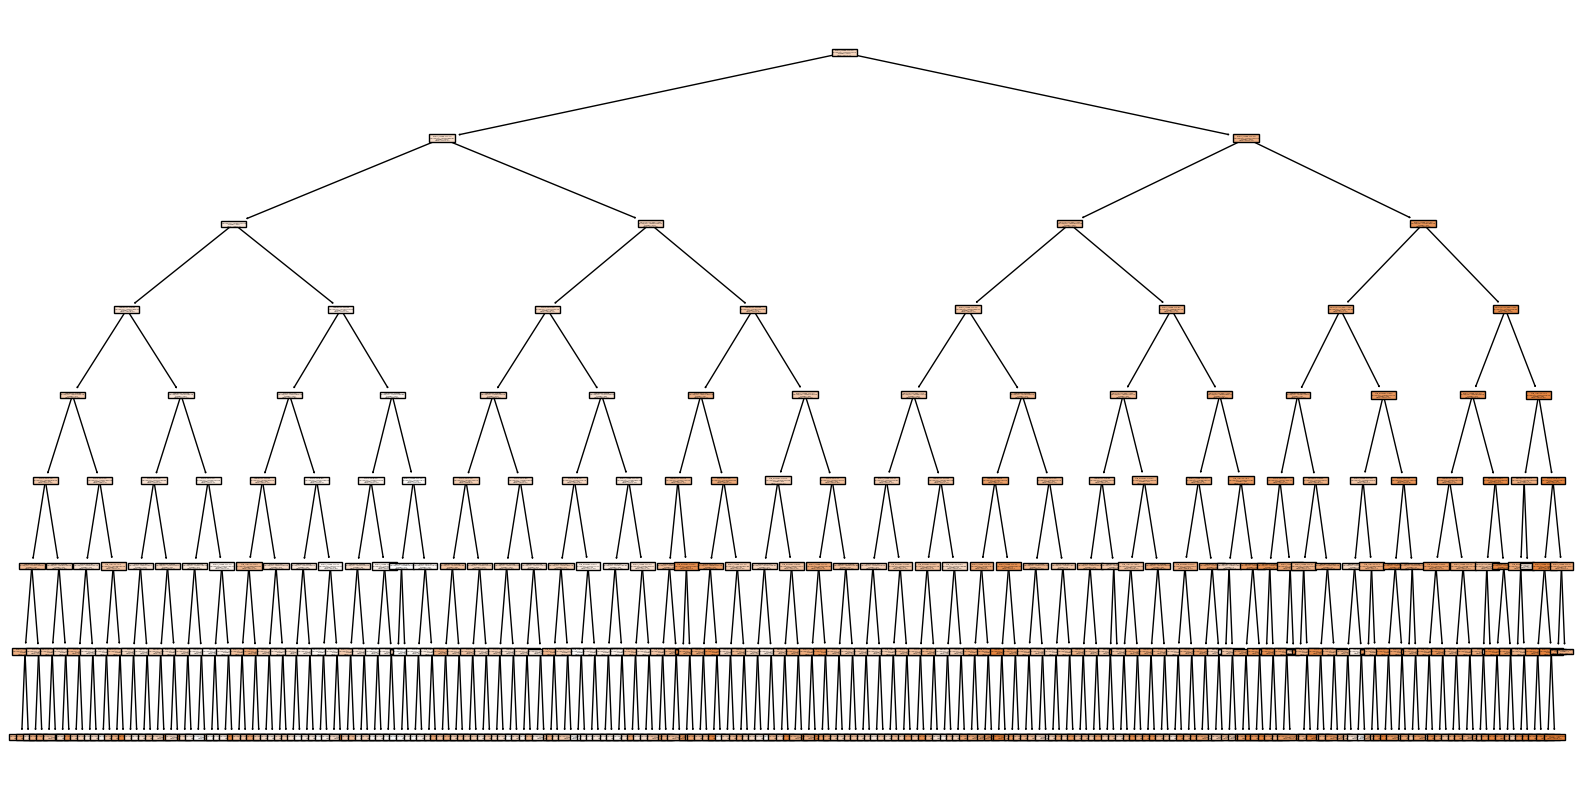

In [20]:
# Convertendo os nomes das colunas para uma lista
feature_names = X.columns.tolist()

# Plotando a árvore de decisão
plt.rc('figure', figsize=(20, 10))
arv_reg_1 = tree.plot_tree(arvore_regr_1, 
                           feature_names=feature_names,  
                           filled=True)

In [21]:
# Representação textual
representacao_textual = tree.export_text(arvore_regr_1)
print(representacao_textual)

|--- feature_7 <= 5.04
|   |--- feature_7 <= 3.19
|   |   |--- feature_1 <= 34.45
|   |   |   |--- feature_0 <= -118.31
|   |   |   |   |--- feature_0 <= -118.35
|   |   |   |   |   |--- feature_1 <= 34.16
|   |   |   |   |   |   |--- feature_0 <= -118.38
|   |   |   |   |   |   |   |--- feature_7 <= 2.64
|   |   |   |   |   |   |   |   |--- value: [311394.53]
|   |   |   |   |   |   |   |--- feature_7 >  2.64
|   |   |   |   |   |   |   |   |--- value: [359787.86]
|   |   |   |   |   |   |--- feature_0 >  -118.38
|   |   |   |   |   |   |   |--- feature_1 <= 34.05
|   |   |   |   |   |   |   |   |--- value: [189865.71]
|   |   |   |   |   |   |   |--- feature_1 >  34.05
|   |   |   |   |   |   |   |   |--- value: [334584.32]
|   |   |   |   |   |--- feature_1 >  34.16
|   |   |   |   |   |   |--- feature_0 <= -119.42
|   |   |   |   |   |   |   |--- feature_2 <= 17.50
|   |   |   |   |   |   |   |   |--- value: [355967.00]
|   |   |   |   |   |   |   |--- feature_2 >  17.50
|   |   | 

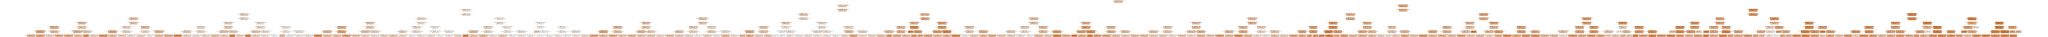

In [22]:
# DOT data
dot_data = tree.export_graphviz(arvore_regr_1, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

A variável que me parece mais importante é a que está no último nível e com mais quebras, no caso, "median_income".

Tanto pela matriz de correlação, como pela visualização gráfica da árvore, a variável mais importante é "median_income".